# **Josué Emmanuel Flores Mendoza A00833132**

 **Parte 1: Cargar datos, verificarlos y analizar features importantes**

In [ ]:
#from google.colab import drive

#drive.mount("/content/gdrive")
#!pwd # directorio de trabajo

Mounted at /content/gdrive
/content


In [ ]:
#%cd "/content/gdrive/MyDrive/Actividades IA avanzada/Módulo ML/Portafolio 1"
#!ls # Lista de archivos ubicados en el folder

/content/gdrive/MyDrive/Actividades IA avanzada/Módulo ML/Portafolio 1
 heart-disease.csv  'Portafolio 1.ipynb'


In [ ]:
# Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math

In [ ]:
# Cargar dataframe
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Columns

*   age: Age of the patient (in years)
*   sex: Sex of the patient (1 = male, 0 = female)
*   cp: Chest pain type (1-4) Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
*   trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
*   chol: Serum cholesterol in mg/dl
*   fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
*   restecg: Resting electrocardiographic results (0-2)
*   thalach: Maximum heart rate achieved
*   exang: Exercise-induced angina (1 = yes; 0 = no)
*   oldpeak: ST depression induced by exercise relative to rest

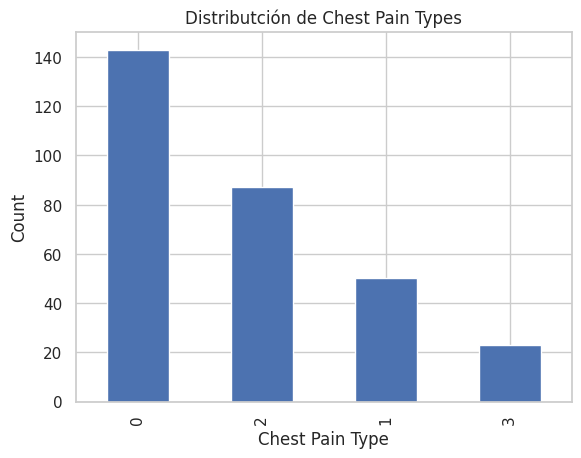

In [ ]:
import matplotlib.pyplot as plt

# Ver la distribución de la columna 'cp'
df['cp'].value_counts().plot(kind='bar')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distributción de Chest Pain Types')
plt.show()



**Descripción de la selección de datos:**

Dado que los datos no estaban distribuidos de manera uniforme y algunas categorías tenían muy pocos registros, decidí centrar el análisis en los dos tipos de dolor en el pecho con mayor cantidad de datos: el tipo 0 (angina típica) y el tipo 2 (dolor no anginal). Por lo tanto, eliminé los registros correspondientes a otros tipos de dolor y transformé el tipo 2 en 1, con el fin de facilitar la construcción de un modelo de regresión logística binaria.

**Actualización:**

Observé que el conjunto de datos contenía una columna adicional denominada "target" que no estaba descrita en la fuente original de Kaggle. Esta columna indica si el sujeto presenta una enfermedad cardíaca (1) o no (0). Aunque realizaré un análisis adicional en otro documento centrado en el objetivo principal del conjunto de datos, en este análisis continuaré enfocándome en la predicción del tipo de dolor en el pecho.


In [ ]:
df_filtered = df[(df['cp'] == 0) | (df['cp'] == 2)]
# Convertimos los valores 2 en 1 en la columna 'cp'
df_filtered['cp'] = df_filtered['cp'].replace(2, 1)

df_filtered.head()

<ipython-input-129-da9428e0e7e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cp'] = df_filtered['cp'].replace(2, 1)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,1,130,250,0,1,187,0,3.5,0,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
8,52,1,1,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,1,150,168,0,1,174,0,1.6,2,0,2,1


Procederé a graficar los datos para identificar posibles relaciones entre las características (features) y la variable objetivo (label). Adicionalmente, calcularé la correlación de cada una de las características con la variable objetivo para determinar cuáles son las características más relevantes del conjunto de datos.

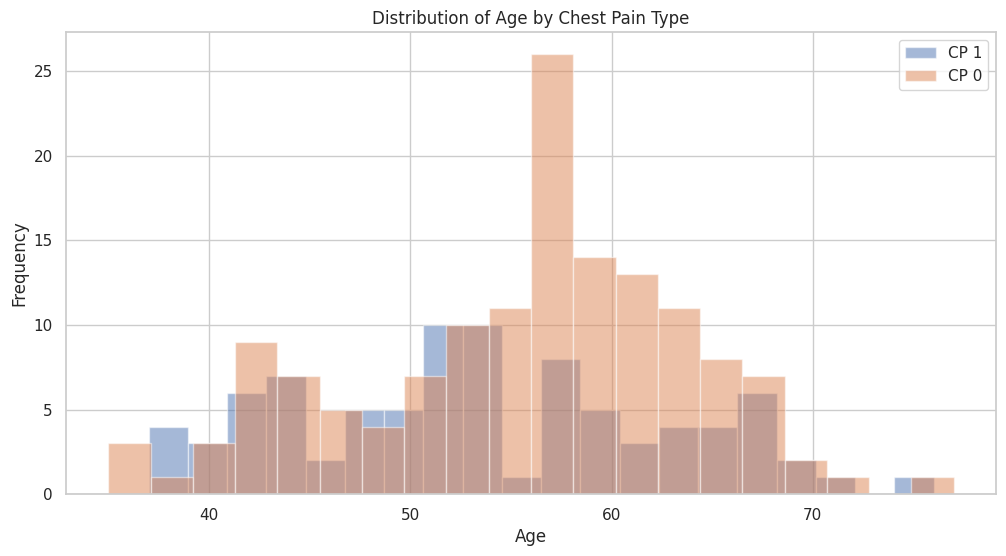

Correlación: -0.12


In [ ]:
import matplotlib.pyplot as plt

# Histogramas para comparar la distribución de la edad
plt.figure(figsize=(12, 6))
for cp_type in df_filtered['cp'].unique():
    plt.hist(df_filtered[df_filtered['cp'] == cp_type]['age'], bins=20, alpha=0.5, label=f'CP {cp_type}')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Chest Pain Type')
plt.legend()
plt.show()
correlation_age = df_filtered[['cp', 'age']].corr().iloc[0, 1]
print(f'Correlación: {correlation_age:.2f}')

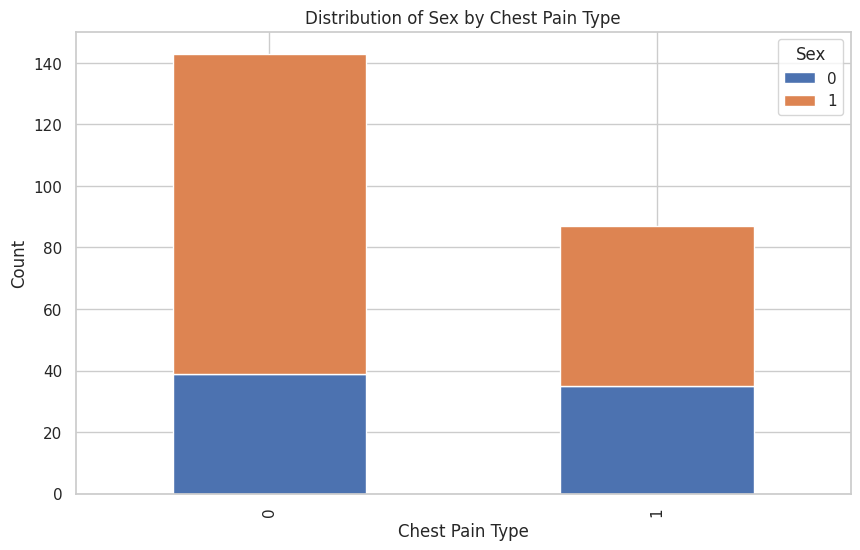

Correlación: -0.13


In [ ]:
# Contar la frecuencia de sexo por tipo de dolor en el pecho
sex_counts = df_filtered.groupby(['cp', 'sex']).size().unstack()

# Graficar
sex_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Sex by Chest Pain Type')
plt.legend(title='Sex')
plt.show()

correlation_sex = df_filtered[['cp', 'sex']].corr().iloc[0, 1]
print(f'Correlación: {correlation_sex:.2f}')


<Figure size 1200x600 with 0 Axes>

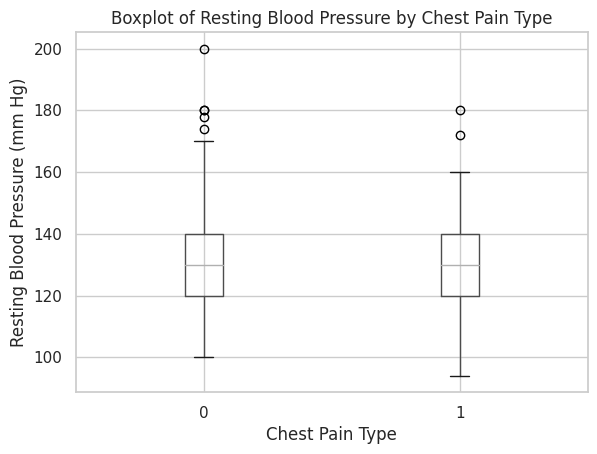

Correlación: -0.05


In [ ]:
# Gráfico de caja para presión arterial en reposo
plt.figure(figsize=(12, 6))
df_filtered.boxplot(column='trestbps', by='cp')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.title('Boxplot of Resting Blood Pressure by Chest Pain Type')
plt.suptitle('')
plt.show()

correlation_trestbps = df_filtered[['cp', 'trestbps']].corr().iloc[0, 1]
print(f'Correlación: {correlation_trestbps:.2f}')

<Figure size 1200x600 with 0 Axes>

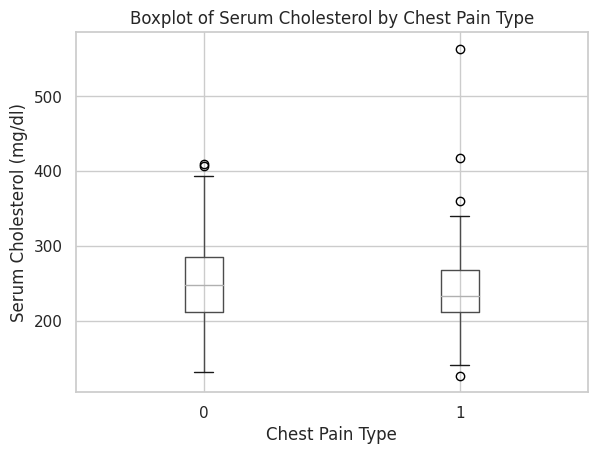

Correlación: -0.06


In [ ]:
# Gráfico de caja para colesterol
plt.figure(figsize=(12, 6))
df_filtered.boxplot(column='chol', by='cp')
plt.xlabel('Chest Pain Type')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.title('Boxplot of Serum Cholesterol by Chest Pain Type')
plt.suptitle('')
plt.show()
correlation_chol = df_filtered[['cp', 'chol']].corr().iloc[0, 1]
print(f'Correlación: {correlation_chol:.2f}')

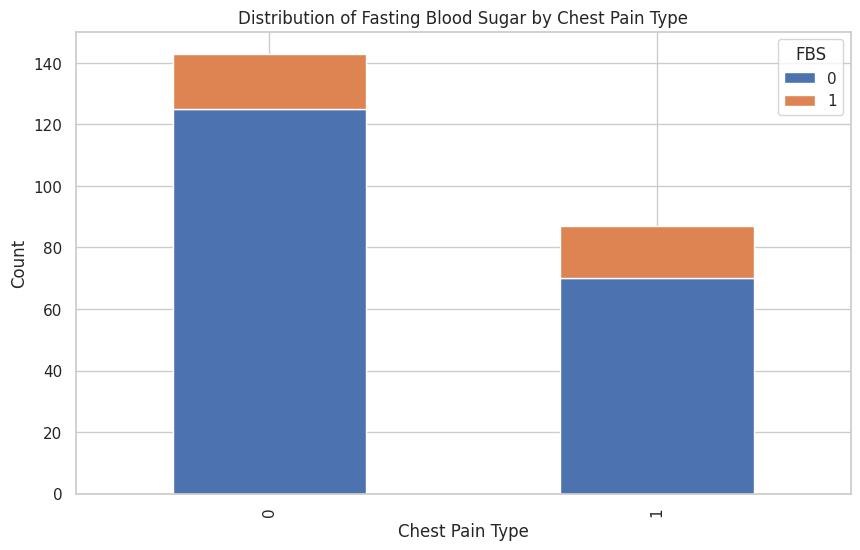

Correlación: 0.09


In [ ]:
# Contar la frecuencia de azúcar en sangre en ayunas por tipo de dolor en el pecho
fbs_counts = df_filtered.groupby(['cp', 'fbs']).size().unstack()

#fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
# Graficar
fbs_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Fasting Blood Sugar by Chest Pain Type')
plt.legend(title='FBS')
plt.show()
# Calcular la correlación entre cp y fbs
correlation_fbs = df_filtered[['cp', 'fbs']].corr().iloc[0, 1]
print(f'Correlación: {correlation_fbs:.2f}')

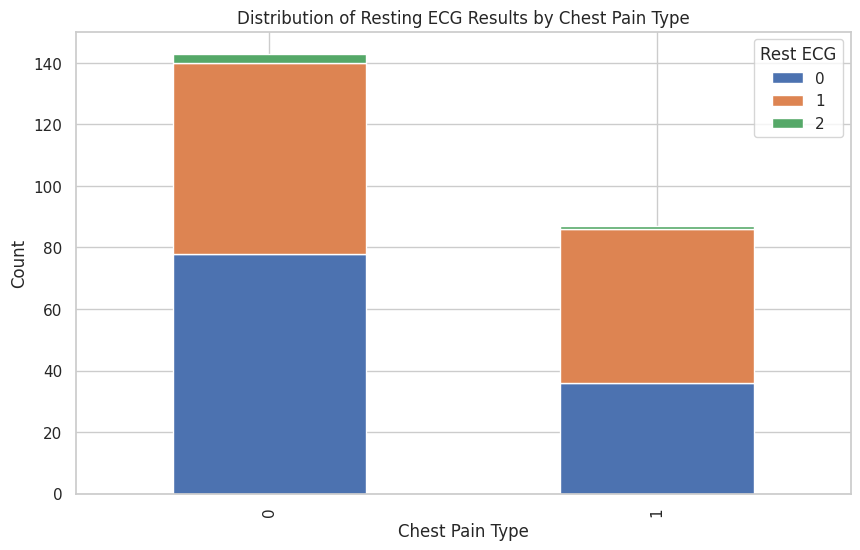

Correlación: 0.11


In [ ]:
# Contar la frecuencia de resultados electrocardiográficos por tipo de dolor en el pecho
restecg_counts = df_filtered.groupby(['cp', 'restecg']).size().unstack()

# Graficar
restecg_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Resting ECG Results by Chest Pain Type')
plt.legend(title='Rest ECG')
plt.show()
correlation_restecg = df_filtered[['cp', 'restecg']].corr().iloc[0, 1]
print(f'Correlación: {correlation_restecg:.2f}')

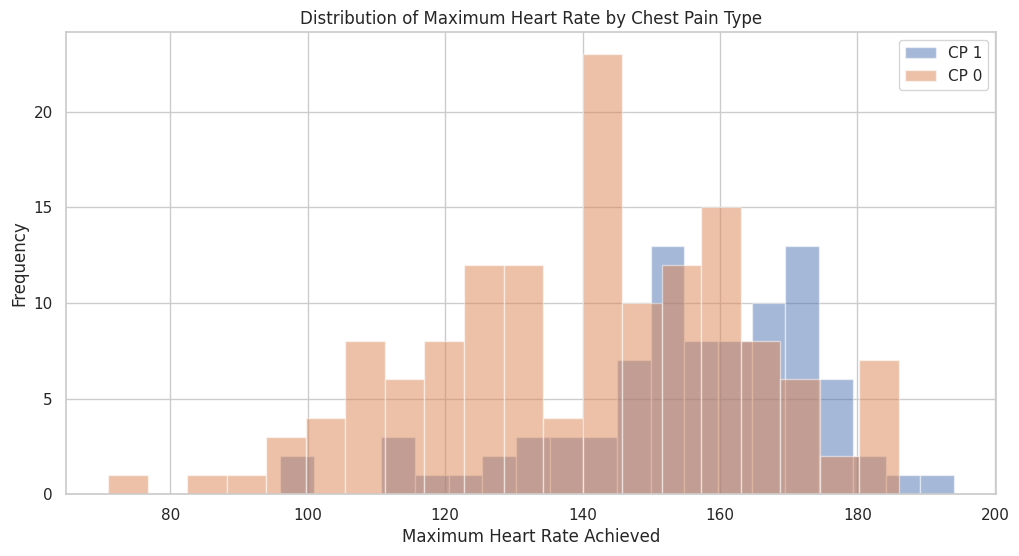

Correlación: 0.32


In [ ]:
# Histogramas para comparar la distribución de la frecuencia cardíaca máxima
plt.figure(figsize=(12, 6))
for cp_type in df_filtered['cp'].unique():
    plt.hist(df_filtered[df_filtered['cp'] == cp_type]['thalach'], bins=20, alpha=0.5, label=f'CP {cp_type}')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Heart Rate by Chest Pain Type')
plt.legend()
plt.show()
# Calcular la correlación entre cp y thalach
correlation_thalach = df_filtered[['cp', 'thalach']].corr().iloc[0, 1]
print(f'Correlación: {correlation_thalach:.2f}')

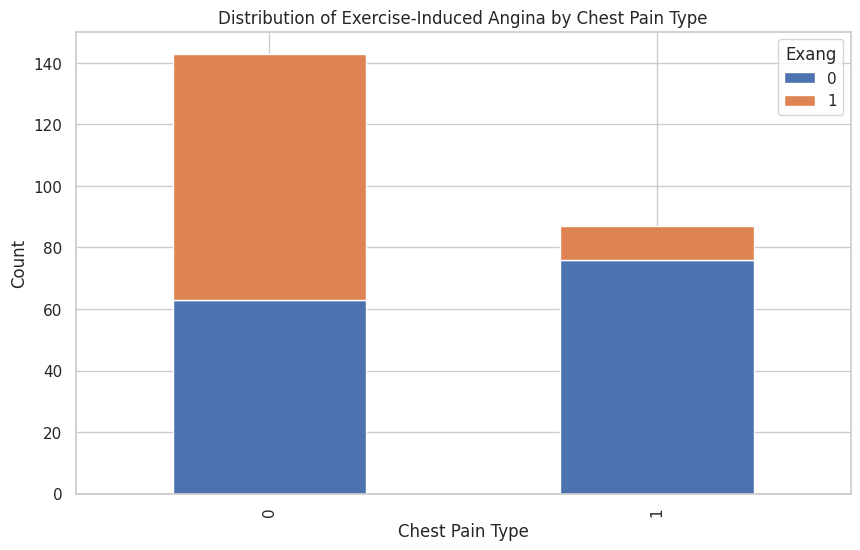

Correlación: -0.43


In [ ]:
# Contar la frecuencia de angina inducida por ejercicio por tipo de dolor en el pecho
exang_counts = df_filtered.groupby(['cp', 'exang']).size().unstack()

# Graficar
exang_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Exercise-Induced Angina by Chest Pain Type')
plt.legend(title='Exang')
plt.show()

# Calcular la correlación entre cp y exang
correlation_exang = df_filtered[['cp', 'exang']].corr().iloc[0, 1]
print(f'Correlación: {correlation_exang:.2f}')

<Figure size 1200x600 with 0 Axes>

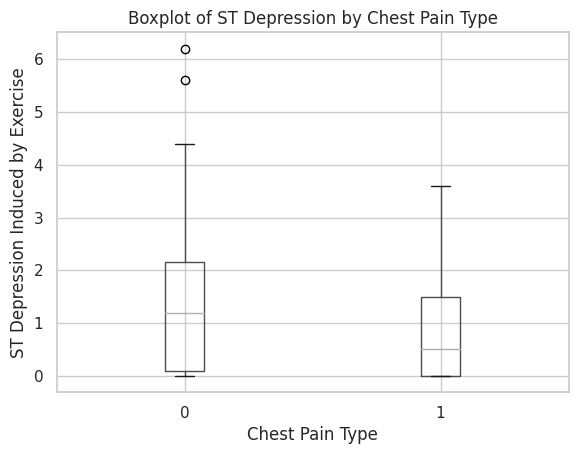

Correlación: -0.24


In [ ]:
# Gráfico de caja para depresión del ST inducida por ejercicio
plt.figure(figsize=(12, 6))
df_filtered.boxplot(column='oldpeak', by='cp')
plt.xlabel('Chest Pain Type')
plt.ylabel('ST Depression Induced by Exercise')
plt.title('Boxplot of ST Depression by Chest Pain Type')
plt.suptitle('')
plt.show()

# Calcular la correlación entre cp y oldpeak
correlation_oldpeak = df_filtered[['cp', 'oldpeak']].corr().iloc[0, 1]
print(f'Correlación: {correlation_oldpeak:.2f}')

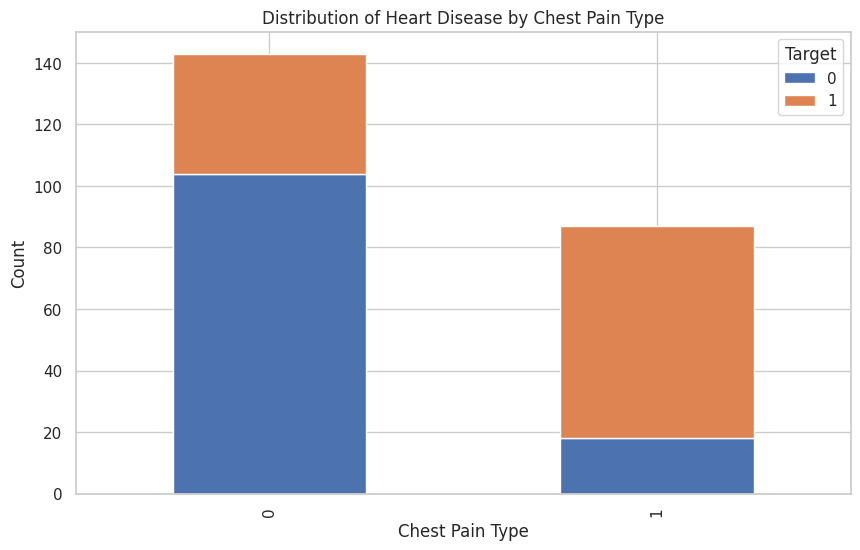

Correlación: 0.51


In [ ]:
# Contar la frecuencia de pacientes con y sin enfermedad cardíaca por tipo de dolor en el pecho
target_counts = df_filtered.groupby(['cp', 'target']).size().unstack()

# Graficar
target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease by Chest Pain Type')
plt.legend(title='Target')
plt.show()

# Calcular la correlación entre cp y target
correlation_target = df_filtered[['cp', 'target']].corr().iloc[0, 1]
print(f'Correlación: {correlation_target:.2f}')

Tras analizar la correlación y las gráficas de cada una de las características en relación con la variable objetivo, considero que las características más importantes son las siguientes:

1. **Frecuencia Cardíaca Máxima Alcanzada (Thalach)**: La correlación de 0.32 sugiere que la frecuencia cardíaca máxima podría ser un buen predictor. Además, la gráfica revela diferencias notables entre los dos tipos de dolor en el pecho en términos de frecuencia cardíaca. Este factor podría ser relevante para incluir en el modelo.

2. **Angina Inducida por Ejercicio (Exang)**: Aunque la correlación es negativa (-0.43), sigue siendo una característica relevante. La gráfica indica que la presencia de angina inducida por ejercicio varía significativamente entre los dos tipos de dolor en el pecho. Se recomienda considerar esta característica en el análisis.

3. **Depresión del ST Inducida por Ejercicio (Oldpeak)**: La correlación de -0.24 sugiere una relación moderada. La gráfica muestra diferencias en los niveles de depresión del ST entre los dos tipos de dolor en el pecho. Sería beneficioso explorar esta característica más a fondo.

4. **Edad**: Aunque la correlación es débil, la gráfica muestra algunos patrones interesantes, como una mayor concentración de casos de CP 0 alrededor de los 58 años. Aunque no es la característica más fuerte, podría ser considerada en el análisis.

5. **Target**: La correlación es fuerte, y la gráfica indica que los pacientes con enfermedades cardíacas tienden a presentar dolor en el pecho de tipo no anginal, mientras que aquellos sin enfermedades tienden a experimentar dolor en el pecho anginal.

Procederé a desarrollar un modelo utilizando únicamente estas características para evaluar si se puede mejorar el rendimiento del modelo ya que anteriormente lo hice con todas las variables pero la efectividad del modelo variaba mucho entre el validation set y el training set.

Parte 2: Dividir los datos en training set, validation set y test set.

In [ ]:
import pandas as pd
import numpy as np

# Establecemos las proporciones para cada conjunto
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

# Barajamos el DataFrame para mezclar las filas
df_shuffled = df_filtered.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculamos los tamaños de cada conjunto
train_size = int(train_ratio * len(df_shuffled))
validation_size = int(validation_ratio * len(df_shuffled))
test_size = len(df_shuffled) - train_size - validation_size

# Dividimos el DataFrame
train_set = df_shuffled.iloc[:train_size]
validation_set = df_shuffled.iloc[train_size:train_size + validation_size]
test_set = df_shuffled.iloc[train_size + validation_size:]

# Ahora los tres conjuntos de datos estan divididos

train_set.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
1,53,1,1,130,246,1,0,173,0,0.0,2,3,2,1
2,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
3,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0
4,51,1,1,110,175,0,1,123,0,0.6,2,0,2,1


Ahora dividiré los datos en label y features

In [ ]:
X_train = train_set[['age', 'thalach',
       'exang', 'oldpeak', 'target']]
y_train = train_set['cp']

X_val = validation_set[['age','thalach',
       'exang', 'oldpeak', 'target']]
y_val = validation_set['cp']

X_test = test_set[['age', 'thalach',
       'exang', 'oldpeak', 'target']]
y_test = test_set['cp']

**Parte 3: Escalar los datos**

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

**Parte 4: Theta**

In [ ]:
# Crear valor theta con valores iniciales
theta = np.random.randn(len(X_train_scaled[0]) + 1, 1)
theta

array([[ 0.57032667],
       [ 0.57449604],
       [ 0.03391187],
       [ 0.29602914],
       [-0.05408336],
       [-0.04139281]])

In [ ]:
# Añadir x0 (columna de 1s) en X para multiplicar theta y obtener bias coeficient
X_vect = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
print(X_vect[:5])
print(X_vect.shape)

[[ 1.          0.16524786 -0.15774502  1.21528724  1.36196586 -0.92226607]
 [ 1.         -0.28378008  1.188383   -0.82285074 -1.00859093  1.08428579]
 [ 1.         -1.40634993  1.09864113 -0.82285074  0.17668746  1.08428579]
 [ 1.          0.72653279  0.33583525  1.21528724  0.0976689  -0.92226607]
 [ 1.         -0.50829405 -1.0551637  -0.82285074 -0.53447957  1.08428579]]
(161, 6)


**Parte 5: Hacer regresión Logistica**

In [ ]:
#Definir la función sigmoide
def sigmoid_function(X):
  return 1/(1+math.e**(-X))

In [ ]:
def log_regression3(X, y, theta, alpha):
  y_ = np.reshape(y, (len(y), 1)) # shape (161,1)
  N = len(X)
  epoch = 0
  avg_loss_list = []
  prev_avg_loss = float('inf')  # Inicializar prev_avg_loss con un valor alto
  avg_loss = float(0)  # Inicializar avg_loss con un valor bajo
  while abs(prev_avg_loss - avg_loss) > 0.01  : #Si la diferencia de avg_loss es menor a 0.01 entonces se acaba el bucle
    epoch = epoch + 1
    sigmoid_x_theta = sigmoid_function(X_vect.dot(theta)) # shape: (161,6).(6,1) = (161,1)
    grad = (1/N) * X_vect.T.dot(sigmoid_x_theta - y_) # shapes: (6,161).(161,1) = (6, 1)
    theta = theta - (alpha * grad)
    hyp = sigmoid_function(X_vect.dot(theta)) # shape (161,6).(6,1) = (161,1)
    prev_avg_loss = avg_loss
    avg_loss = -np.sum(np.dot(y_.T, np.log(hyp) + np.dot((1-y_).T, np.log(1-hyp)))) / len(hyp)
    if epoch % 1000 == 0:
      print('epoch: {} | avg_loss: {}'.format(epoch, avg_loss))
    avg_loss_list.append(avg_loss)
  print('epoch: {} | avg_loss: {}'.format(epoch, avg_loss))
  plt.plot(np.arange(1, epoch), avg_loss_list[1:], color='red')
  plt.title('Cost function')
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.show()
  return theta


#Función similar pero para probar distintos hiperparametros
def log_regression_hyper(X, y, theta, alpha,specific_epochs):
  y_ = np.reshape(y, (len(y), 1)) # shape (161,1)
  N = len(X)
  epoch = 0
  avg_loss_list = []
  prev_avg_loss = float('inf')  # Inicializar prev_avg_loss con un valor alto
  avg_loss = float(0)  # Inicializar avg_loss con un valor bajo
  # while abs(prev_avg_loss - avg_loss) > 0.001  :
  while epoch < specific_epochs  :
    epoch = epoch + 1
    sigmoid_x_theta = sigmoid_function(X_vect.dot(theta)) # shape: (150,5).(5,1) = (150,1)
    grad = (1/N) * X_vect.T.dot(sigmoid_x_theta - y_) # shapes: (6,161).(161,1) = (6, 1)
    theta = theta - (alpha * grad)
    hyp = sigmoid_function(X_vect.dot(theta)) # shape (161,6).(6,1) = (161,1)
    prev_avg_loss = avg_loss
    avg_loss = -np.sum(np.dot(y_.T, np.log(hyp) + np.dot((1-y_).T, np.log(1-hyp)))) / len(hyp)
    if epoch % 1000 == 0:
      print('epoch: {} | avg_loss: {}'.format(epoch, avg_loss))
    avg_loss_list.append(avg_loss)
  print('epoch: {} | avg_loss: {}'.format(epoch, avg_loss))
  plt.plot(np.arange(1, epoch), avg_loss_list[1:], color='red')
  plt.title('Cost function')
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.show()
  return theta

epoch: 34 | avg_loss: 13.722412104307995


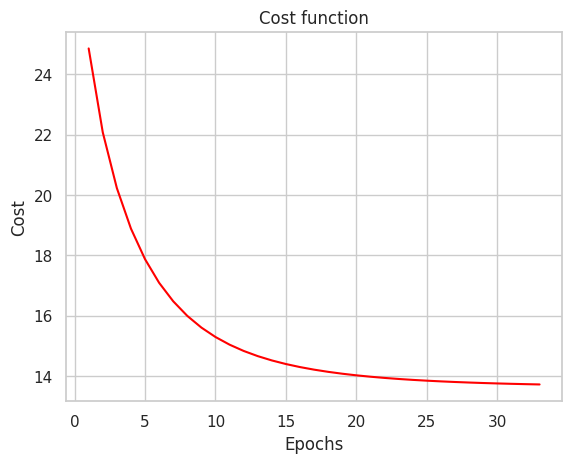

In [ ]:
alpha = 1
best_params = log_regression3(X_train_scaled, y_train, theta, alpha)

In [ ]:
print(best_params)

[[-0.83413304]
 [ 0.21544548]
 [ 0.47375874]
 [-0.44279001]
 [ 0.0695737 ]
 [ 0.92348547]]


**Parte 6: Probar datos en el validation set y utilizar diferentes hyperparametros para ver si hay mejorías**

In [ ]:
def predict_log_regression(X, theta):
    X_to_predict = np.c_[np.ones((len(X), 1)), X] # añadir x0 para bias
    # print(X_to_predict)
    # calcular la probabilidad con la función sigmoide
    pred_probability = sigmoid_function(X_to_predict.dot(theta))
    return pred_probability


In [ ]:
# Hacer las predicciones con el set de validación
X_to_predict = [list(X_val_scaled[0])]

X_vect_val = [list(X_val_scaled)]

X_to_predict = np.c_[np.ones((len(X_to_predict), 1)), X_to_predict] # add x0 for bias

pred_probability = sigmoid_function(X_to_predict.dot(best_params))

print("La predicción para el dato de validation es:", pred_probability)

La predicción para el dato de validation es: [[0.10689585]]


In [ ]:
y_true = y_val
y_pred = np.array([predict_log_regression(x, best_params) for x in X_vect_val])

pred_val = (y_pred >= 0.5).astype(int).flatten()


conf_matrix = pd.crosstab(pd.Series(y_true.values, name='Actual'), pd.Series(pred_val, name='Predicted'))

# # Visualiza la matriz de confusión
print(conf_matrix)

Predicted   0  1
Actual          
0          19  4
1           3  8


In [ ]:
accuracy = np.mean(y_true.values == pred_val)
print(f'Exactitud: {accuracy}')

Exactitud: 0.7941176470588235


Para evaluar si esta es la mejor opción en función de los hiperparámetros, analizaré cómo varía el rendimiento del modelo al modificar diferentes valores de alpha.

**Alpha 0.1**

epoch: 177 | avg_loss: 14.377609865693366


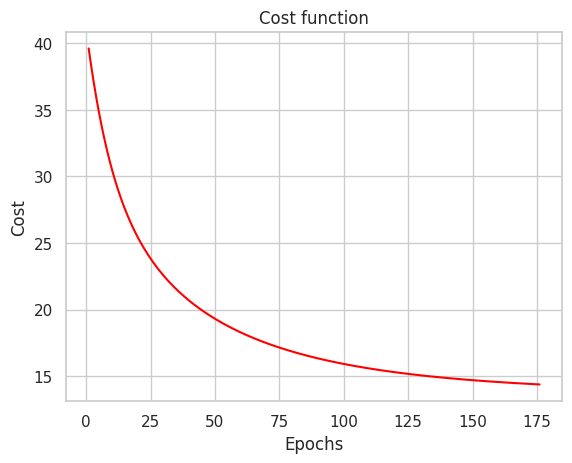

In [ ]:
alpha = 0.1
best_params01 = log_regression3(X_train_scaled, y_train, theta, alpha)

In [ ]:
y_pred = np.array([predict_log_regression(x, best_params01) for x in X_vect_val])

pred_val = (y_pred >= 0.5).astype(int).flatten()


conf_matrix = pd.crosstab(pd.Series(y_true.values, name='Actual'), pd.Series(pred_val, name='Predicted'))

# # Visualiza la matriz de confusión
print(conf_matrix)

Predicted   0  1
Actual          
0          18  5
1           3  8


In [ ]:
accuracy = np.mean(y_true.values == pred_val)
print(f'Exactitud: {accuracy}')

Exactitud: 0.7647058823529411


**Con Alpha 0.01**

epoch: 1000 | avg_loss: 15.989076771807479
epoch: 2000 | avg_loss: 14.1965987565186
epoch: 3000 | avg_loss: 13.810078997443812
epoch: 4000 | avg_loss: 13.696885226668886
epoch: 5000 | avg_loss: 13.65767713727657
epoch: 6000 | avg_loss: 13.642561220152185
epoch: 7000 | avg_loss: 13.63623668137255
epoch: 8000 | avg_loss: 13.63340200029781
epoch: 9000 | avg_loss: 13.632055618970417
epoch: 10000 | avg_loss: 13.631385575785446
epoch: 11000 | avg_loss: 13.631040095233182
epoch: 12000 | avg_loss: 13.630857359222059
epoch: 13000 | avg_loss: 13.630758984485617
epoch: 14000 | avg_loss: 13.630705394376026
epoch: 15000 | avg_loss: 13.630675972557627
epoch: 16000 | avg_loss: 13.630659737553824
epoch: 17000 | avg_loss: 13.630650749803609
epoch: 18000 | avg_loss: 13.63064576375605
epoch: 19000 | avg_loss: 13.630642994006203
epoch: 20000 | avg_loss: 13.630641454104486
epoch: 20000 | avg_loss: 13.630641454104486


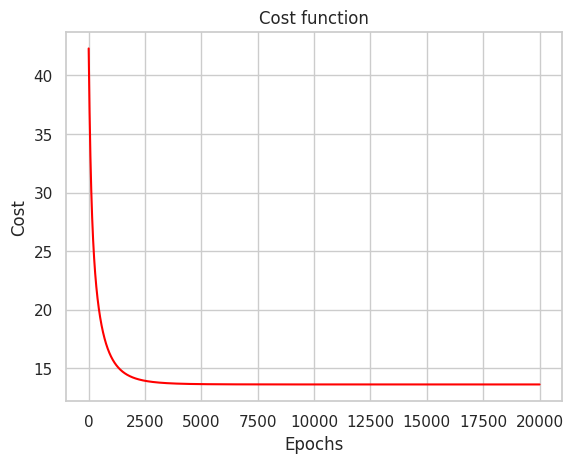

In [ ]:
alpha = 0.01
best_params001 = log_regression_hyper(X_train_scaled, y_train, theta, alpha,20000)

In [ ]:
y_pred = np.array([predict_log_regression(x, best_params001) for x in X_vect_val])

pred_val = (y_pred >= 0.5).astype(int).flatten()


conf_matrix = pd.crosstab(pd.Series(y_true.values, name='Actual'), pd.Series(pred_val, name='Predicted'))

# # Visualiza la matriz de confusión
print(conf_matrix)

Predicted   0  1
Actual          
0          19  4
1           3  8


In [ ]:
accuracy = np.mean(y_true.values == pred_val)
print(f'Exactitud: {accuracy}')

Exactitud: 0.7941176470588235


Intenté ajustar los valores de alpha para observar si el rendimiento del modelo mejoraba, pero los resultados obtenidos fueron muy similares entre sí, con la única diferencia en el número de epochs. En este caso, optaría por utilizar un valor de alpha de 1.

**Parte 7, probar modelo en el test set:**

In [ ]:
# Hacer predicciones en el test set
X_to_predict = [list(X_test_scaled[0])]

X_vect_test = [list(X_test_scaled)]

X_to_predict = np.c_[np.ones((len(X_to_predict), 1)), X_to_predict] # añadir x0 para el bias

pred_probability = sigmoid_function(X_to_predict.dot(best_params))

print("La predicción para el dato de test es:", pred_probability)

La predicción para el dato de test es: [[0.57169053]]


In [ ]:
y_true = y_test
y_pred = np.array([predict_log_regression(x, best_params) for x in X_vect_test])

pred_val = (y_pred >= 0.5).astype(int).flatten()


conf_matrix = pd.crosstab(pd.Series(y_true.values, name='Actual'), pd.Series(pred_val, name='Predicted'))

# # Visualiza la matriz de confusión
print(conf_matrix)

Predicted   0   1
Actual           
0          14   3
1           6  12


In [ ]:
accuracy = np.mean(y_true.values == pred_val)
print(f'Exactitud: {accuracy}')

Exactitud: 0.7428571428571429


# **Reporte final de lo aprendido**
### Reporte Final sobre Análisis de Datos y Uso de Regresión Logística

En este trabajo, he desarrollado un modelo de regresión logística para clasificar el tipo de dolor en el pecho (chest pain) en un dataset de enfermedades cardíacas. A través del análisis de datos y la selección de características, he aprendido la importancia de utilizar métodos gráficos y de correlación para mejorar la efectividad del modelo.

**Lo Aprendido:**

1. **Importancia de la Selección de Características:**
   - Inicialmente, el modelo fue entrenado utilizando todas las características disponibles. Sin embargo, se observó una discrepancia significativa entre la efectividad del modelo en el conjunto de entrenamiento y el conjunto de validación.
   - La exactitud en el conjunto de validación con todas las características fue de 0.794, mientras que en el conjunto de prueba fue de 0.629. Esta diferencia sugiere que el modelo estaba sobreajustado a las características del conjunto de entrenamiento.

2. **Uso de Gráficos y Correlación:**
   - Para mejorar la precisión del modelo, se llevó a cabo un análisis exhaustivo de las características utilizando gráficos y correlaciones. Este proceso permitió identificar cuáles características eran más relevantes para el modelo.
   - Se seleccionaron las características basadas en este análisis, eliminando las menos relevantes y las que presentaban una alta multicolinealidad.

3. **Ajuste de hiperparametros:**
   - Al comparar la efectividad del modelo con los datos de validación me pude dar cuenta de que no había mucha variación por lo que opte por quedarme con el modelo con alpha = 1 ya que tenía los mismos resultados y a menores epochs

3. **Resultados Comparativos:**
   - **Modelo con Todas las Características:**
     - Exactitud en el conjunto de validación: 0.794
     - Exactitud en el conjunto de prueba: 0.657
   - **Modelo con Características Seleccionadas:**
     - Exactitud en el conjunto de validación: 0.794
     - Exactitud en el conjunto de prueba: 0.743

**Importancia del Análisis de Datos:**

El análisis de datos, incluyendo la visualización gráfica y la evaluación de correlaciones, juega un papel crucial en la selección de características para modelos predictivos. En mi experiencia, este análisis no solo ayuda a identificar las características más influyentes, sino que también contribuye a reducir el sobreajuste y mejorar la capacidad de generalización del modelo en datos no vistos. Al seleccionar las características adecuadas, se logra una mejor precisión y estabilidad en la predicción, como se reflejó en los resultados del modelo.

Modelo con todas las características: https://colab.research.google.com/drive/14Aa8nk9kV6mryF-090cRH28sEjGCMJru?usp=sharing

**Actualización:**

Observé que el conjunto de datos contenía una columna adicional denominada "target" que no estaba descrita en la fuente original de Kaggle. Esta columna indica si el sujeto presenta una enfermedad cardíaca (1) o no (0). Aunque realizaré un análisis adicional en otro documento centrado en el objetivo principal del conjunto de datos, en este análisis continuaré enfocándome en la predicción del tipo de dolor en el pecho.

Modelo con label en target (objetivo principal): https://colab.research.google.com/drive/1HrXiPQaNXl1NWNNg-zEH3LtVNAxN26aO?usp=sharing
